In [2]:
import tensorflow as tf 
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
embedder = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [4]:
text = ["Hi I am Rohit How are you ?","Can you please hold my hand ?"]

In [5]:
tokenized_objs = tokenizer(text,return_tensors='tf',padding=True)
encoded_ip = tokenized_objs.input_ids
encoded_ip

<tf.Tensor: shape=(2, 11), dtype=int32, numpy=
array([[  101,  7632,  1045,  2572, 20996, 16584,  2129,  2024,  2017,
         1029,   102],
       [  101,  2064,  2017,  3531,  2907,  2026,  2192,  1029,   102,
            0,     0]])>

In [10]:
tokenized_objs

{'input_ids': <tf.Tensor: shape=(2, 11), dtype=int32, numpy=
array([[  101,  7632,  1045,  2572, 20996, 16584,  2129,  2024,  2017,
         1029,   102],
       [  101,  2064,  2017,  3531,  2907,  2026,  2192,  1029,   102,
            0,     0]])>, 'token_type_ids': <tf.Tensor: shape=(2, 11), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(2, 11), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])>}

In [6]:
embedded_op = embedder(encoded_ip)


In [7]:
embedded_op

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(2, 11, 768), dtype=float32, numpy=
array([[[-4.55153465e-01, -3.31224859e-01, -1.90732002e-01, ...,
         -2.79968679e-01,  5.56606174e-01,  5.09237647e-01],
        [ 2.99350202e-01,  1.14764914e-01,  1.72971949e-01, ...,
         -1.80919990e-01,  1.04944754e+00, -2.63404816e-01],
        [-4.81928349e-01, -4.06480402e-01, -4.78375852e-02, ...,
         -2.84271210e-01,  7.18219221e-01,  7.12675750e-02],
        ...,
        [-3.56820732e-01, -1.45313346e+00,  7.87590668e-02, ...,
         -1.97038949e-01,  6.87917471e-01, -5.80783427e-01],
        [-3.81709218e-01, -1.25138116e+00, -9.59350944e-01, ...,
          1.00694433e-01,  1.89323992e-01,  1.59343049e-01],
        [ 5.52259803e-01, -3.03290486e-01, -2.70610303e-01, ...,
          1.19717807e-01, -3.54195833e-01, -2.24331275e-01]],

       [[ 3.56237516e-02, -2.81747244e-02,  4.39100564e-02, ...,
         -2.73295879e-01,  1.41104534e-01,  3

In [16]:
embedded_op.last_hidden_state

<tf.Tensor: shape=(2, 11, 768), dtype=float32, numpy=
array([[[-4.55153465e-01, -3.31224859e-01, -1.90732002e-01, ...,
         -2.79968679e-01,  5.56606174e-01,  5.09237647e-01],
        [ 2.99350202e-01,  1.14764914e-01,  1.72971949e-01, ...,
         -1.80919990e-01,  1.04944754e+00, -2.63404816e-01],
        [-4.81928349e-01, -4.06480402e-01, -4.78375852e-02, ...,
         -2.84271210e-01,  7.18219221e-01,  7.12675750e-02],
        ...,
        [-3.56820732e-01, -1.45313346e+00,  7.87590668e-02, ...,
         -1.97038949e-01,  6.87917471e-01, -5.80783427e-01],
        [-3.81709218e-01, -1.25138116e+00, -9.59350944e-01, ...,
          1.00694433e-01,  1.89323992e-01,  1.59343049e-01],
        [ 5.52259803e-01, -3.03290486e-01, -2.70610303e-01, ...,
          1.19717807e-01, -3.54195833e-01, -2.24331275e-01]],

       [[ 3.56237516e-02, -2.81747244e-02,  4.39100564e-02, ...,
         -2.73295879e-01,  1.41104534e-01,  3.12666714e-01],
        [ 3.25955361e-01,  4.24369216e-01,  3.679

In [6]:
embedded_op[1].shape

TensorShape([2, 768])

In [7]:
bert_op = embedded_op[0]

In [8]:
bert_op.shape

TensorShape([2, 11, 768])

In [9]:
pooler_output = bert_op[:, 0, :]
pooler_output

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.45515347, -0.33122486, -0.190732  , ..., -0.27996868,
         0.5566062 ,  0.50923765],
       [ 0.03562375, -0.02817472,  0.04391006, ..., -0.27329588,
         0.14110453,  0.3126667 ]], dtype=float32)>

In [10]:
embedded_op[1]

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.91219264, -0.61218685, -0.9788873 , ..., -0.9460341 ,
        -0.7960423 ,  0.8989942 ],
       [-0.85701895, -0.26258326, -0.10938799, ...,  0.31398237,
        -0.70387363,  0.8820532 ]], dtype=float32)>

In [17]:
# input layer which takes input ids generated by the bert tokenizer
input_ids = tf.keras.layers.Input(shape=(120,), dtype=tf.int32, name="input_ids")

# Bert Embedding layer which will create a dense vector of each token coming from input layer
embedded_output = embedder(input_ids)[0]

# Regression head using LSTM 
regression_head = Sequential([
    LSTM(units=500,return_sequences=True),
    LSTM(units=250),
    Dropout(0.15),
    Dense(units=500,activation='relu'),
    Dropout(0.1),
    Dense(units=500,activation='tanh'),
    Dense(units=1,activation='linear')
])

#final output after passing through the regression head
final_output = regression_head(embedded_output)

# defining the final model
bert_lstm_model = tf.keras.models.Model(inputs=[input_ids],outputs=final_output)

bert_lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 120)]             0         
                                                                 
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPo   109482240 
 )                           olingAndCrossAttentions             
                             (last_hidden_state=(Non             
                             e, 120, 768),                       
                              pooler_output=(None, 7             
                             68),                                
                              past_key_values=None,              
                             hidden_states=None, att             
                             entions=None, cross_att             
                             entions=None)                       
                                                             

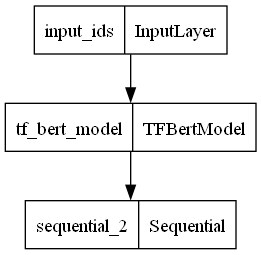

In [18]:
tf.keras.utils.plot_model(bert_lstm_model)